Lớp **Lập trình cho Khoa học dữ liệu - 17_21**  
Học kì II, 2019 - 2020  

<hr>
<br>
<center><b><font size="10">ĐỒ ÁN CUỐI KÌ</font></b></center>
<br>
<center>
    <font size="4"><b>Sinh viên thực hiện:</b></font>
    <br> Trần Minh Trí - 1712834<br>
</center>
<hr>

# I. Chủ đề quan tâm

<font size="4.5">  Tại sao Mỹ, một đất nước phát triển với nền tảng khoa học và cơ sở hạ tầng y tế tiên tiến hàng đầu thế giới lại đứng top 1 về số ca nhiễm và tử vong bởi **covid 19**? </font>

## 1. Một số thông tin về tình hình ở Mỹ trước khi dịch bùng phát 

Ca nhiễm covid 19 đầu tiên được phát hiện vào ngày **21/1**

Tổng thống Donald Trump ban bố tình trạng khẩn cấp quốc gia về covid 19 vào ngày **13/3**.

Theo [The Washington Post](https://www.washingtonpost.com/national-security/2020/04/04/coronavirus-government-dysfunction/?arc404=true): 
- Các thông tin cơ bản về virus corona không được thông báo đến Trump bởi các quan chức y tế cho đến 18/1. Cùng lúc đó, Trump đang đấu tranh trước các cáo buộc cưỡng chế chính trị đối với Ukraine. 

- Alex Azar, U.S. Serectary of Health and Human Services, kiềm chế không gây áp lực với tổng thống và thay vào đó, ông bảo Trump rằng "tình hình hiện tại đang được giám sát và đánh giá"

Theo [The New York Times](https://www.nytimes.com/2020/04/11/us/politics/coronavirus-trump-response.html): 
 - Những phản ứng với virus corona của Trump trong khoảng thời gian bị cáo buộc đã bị làm mờ bởi những nghi ngờ và khinh bỉ. Đối với ông, nhiều chuyên gia và quan chức có năng lực thuộc phe đối lập. 
 - Ông còn gọi dịch bệnh này là một "trò bịp" của phe Dân Chủ. Speaker of the House Nancy Pelosi ngược lại gọi phản hồi của chính quyền Trump trước cuộc khủng hoảng là mờ mịt và hỗn loạn

## 2. Các câu hỏi cần trả lời:

 1. Sự bùng phát dịch bệnh ở Mỹ xảy ra như thế nào? (Mức độ nhiễm qua từng tháng)
 2. Liệu mâu thuẫn chính trị giữa các đảng phái ở Mỹ có ảnh hưởng đến sự bùng phát dịch bệnh?
 3. Đưa ra dẫn chứng về sự khác biệt chính sách giữa các đảng phái ở Mỹ có liên quan đến sự lây lan của dịch bệnh

# II. Thu thập dữ liệu

Để có một bộ dữ liệu liên quan đến covid 19, ta tìm trên kaggle và tìm được [bộ dữ liệu sau](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) (file "covid_19_data.csv")

Ta thu thập thêm dữ liệu về các bang chịu ảnh hưởng lớn về chính trị 2 đảng phái lớn ở Mỹ và thu thập chính sách về việc "Bắt buộc đeo khẩu trang khi ra nơi công cộng" của các bang để xét xem có sự khác biệt. 

Dữ liệu thu được: [Chính kiến các bang](https://en.wikipedia.org/wiki/2016_United_States_presidential_election) và [Ngày bắt đầu luật bắt buộc đeo khẩu trang các bang](https://edition.cnn.com/2020/06/19/us/states-face-mask-coronavirus-trnd/index.html)

Ta ghi chép dữ liệu này vào file "US_Additional_Info.csv"

# III. Khám phá dữ liệu

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
covid_info = pd.read_csv("covid_19_data.csv", index_col="SNo")
state_info = pd.read_csv("US_Additional_Info.csv")

In [3]:
covid_info.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
state_info.head()

,State,Must wear mask since,Politic
0,Alabama,15-07-20,Red
1,Alaska,NaN,Red
2,Arizona,NaN,Red
3,Arkansas,20-07-20,Red
4,California,18-06-20,Blue


Ở **covid_info**, ta có cột dữ liệu sau:
 - `ObservationDate`: Ngày mà dữ liệu lưu lại
 - `Province/State`: Tỉnh, khu vực, bang
 - `Country/Region`: Nước/vùng lãnh thổ
 - `Last Update`: Lần update cuối cùng trong ngày ObservationDate
 - `Confirmed`: Số ca nhiễm
 - `Deaths`: Số ca tử vong
 - `Recovered`: Số ca hồi phục

Ở **state_info**, ta có cột dữ liệu:
 - `State`: Tên bang ở Mỹ
 - `Must wear mask since`: Ngày luật bắt buộc đeo khẩu trang có hiệu lực
 - `Politic`: Đảng có ảnh hưởng lớn hơn ở bang này (Red = Republican, Blue = Democratic)

Ở **covid_info** ta chỉ quan tâm nước Mỹ, nên ta lọc **Country/Region	== US** và đồng thời bỏ cột Country/Region

Ta bỏ qua cột **Last Update**, chỉ chú trọng cột **ObservationDate**

In [5]:
covid_info = covid_info[covid_info["Country/Region"] == "US"].drop(["Last Update", "Country/Region"], axis=1)
covid_info.head()

,ObservationDate,Province/State,Confirmed,Deaths,Recovered
SNo,,,,,
32,01/22/2020,Washington,1.0,0.0,0.0
70,01/23/2020,Washington,1.0,0.0,0.0
118,01/24/2020,Washington,1.0,0.0,0.0
119,01/24/2020,Chicago,1.0,0.0,0.0
159,01/25/2020,Washington,1.0,0.0,0.0


In [6]:
covid_info.dtypes

ObservationDate     object
Province/State      object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Cần convert **ObservationDate** sang DateTime

In [7]:
covid_info["ObservationDate"] = pd.to_datetime(covid_info["ObservationDate"], format="%m/%d/%Y")

In [8]:
covid_info.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [36]:
state_info.dtypes

State                   object
Must wear mask since    object
Politic                 object
dtype: object

# IV. Sử dụng dữ liệu để trả lời các câu hỏi

## 1. Sự bùng phát dịch bệnh ở Mỹ xảy ra như thế nào? (Mức độ nhiễm qua từng tháng)

In [12]:
info_per_date = covid_info.groupby("ObservationDate").sum()

Text(0, 0.5, 'Infected (million)')

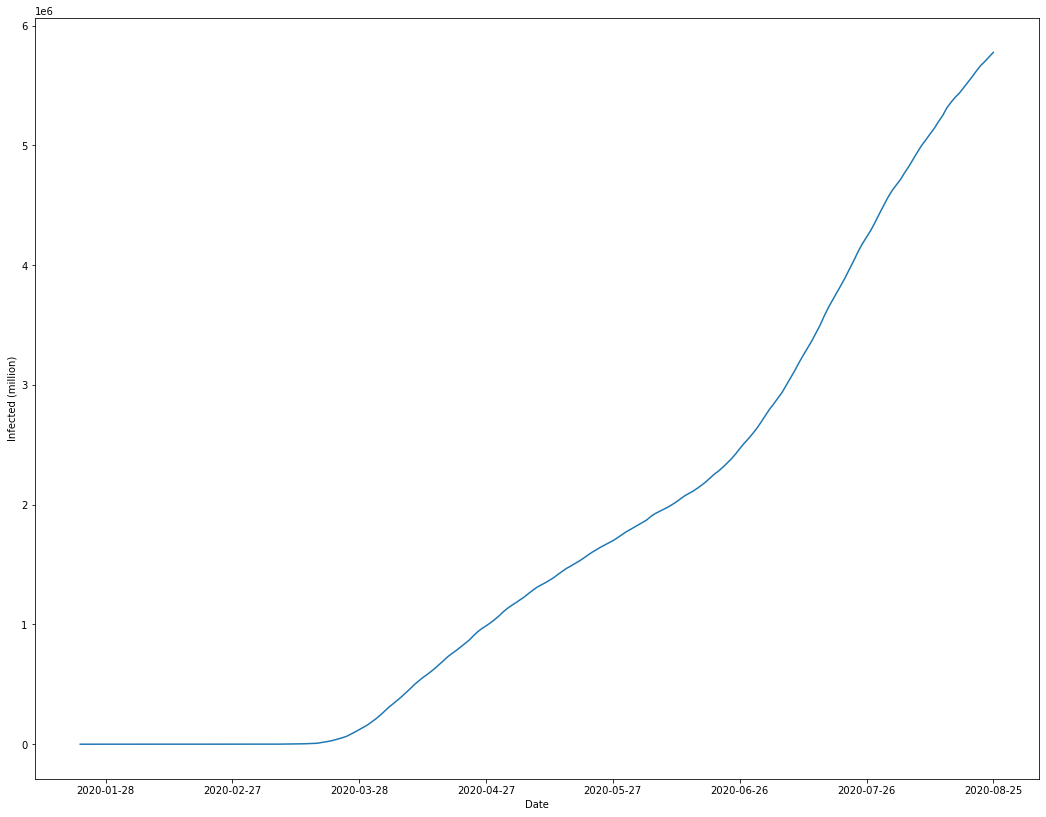

In [11]:
plt.figure(figsize=(18,14))
plt.plot(info_per_date["Confirmed"])

ax = plt.gca()
i = len(info_per_date["Confirmed"].index) - 1
tick = []
while i>=0:
    tick.append(info_per_date["Confirmed"].index[i])
    i-=30
ax.axes.xaxis.set_ticks(tick)

plt.xlabel("Date")
plt.ylabel("Infected (million)")

Text(0, 0.5, 'Infected (million)')

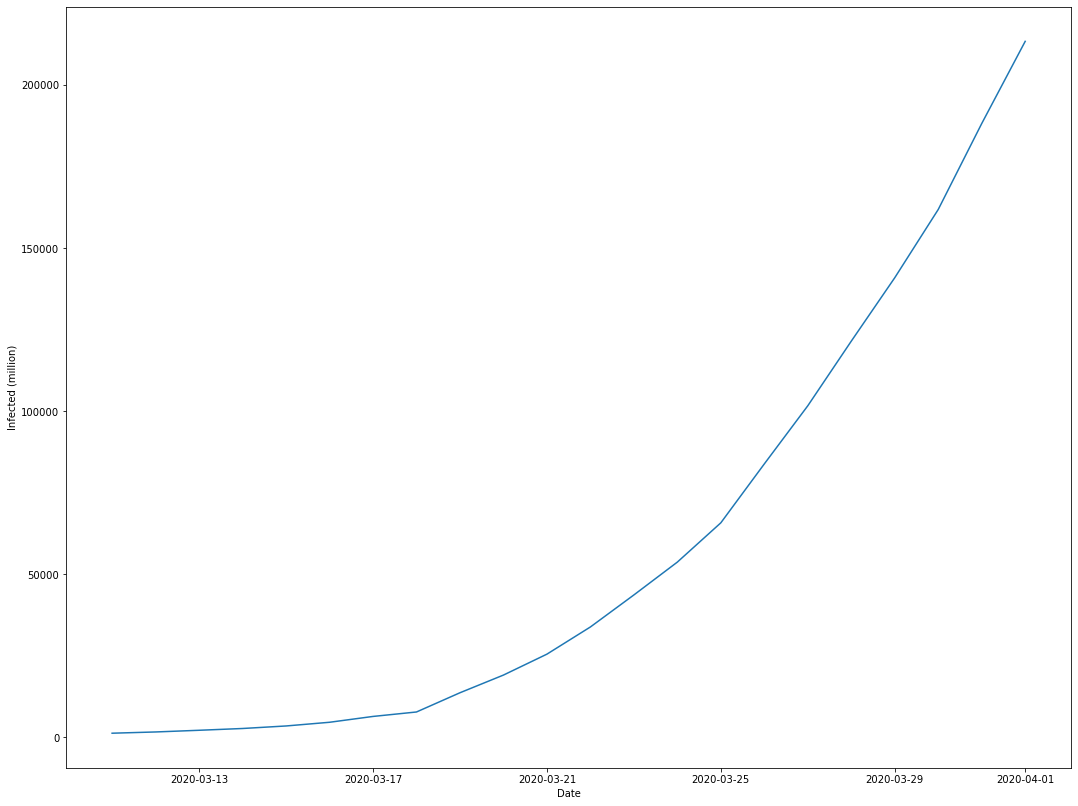

In [26]:
df = info_per_date[info_per_date.index >= "2020-03-11"]
df = df[df.index <= "2020-04-1"]
plt.figure(figsize=(18,14))
plt.plot(df["Confirmed"])
plt.xlabel("Date")
plt.ylabel("Infected (million)")

Ta thấy được số ca nhiễm dường như tăng đột biết vào khoảng giữa tháng 3, ngay sau khi tình trạng khẩn cấp quốc gia được ban bố nhưng cách ngày phát hiện ca nhiễm đầu tiên đến 2 tháng

Liệu trước đó đã có nhiều người nhiễm nhưng không phát hiện cho tới sau khi tình trạng khẩn cấp quốc gia?

## 2. Liệu mâu thuẫn chính trị giữa các đảng phái ở Mỹ có ảnh hưởng đến sự bùng phát dịch bệnh?

Để trả lời câu hỏi này, ta tìm hiểu mức độ lây nhiễm giữa các bang chịu ảnh hưởng chính trị bởi 2 đảng phái đối lập

In [33]:
red_state = state_info[state_info["Politic"] == "Red"]["State"].to_numpy()
red_state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Colorado', 'Florida',
       'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [34]:
blue_state = state_info[state_info["Politic"] == "Blue"]["State"].to_numpy()
blue_state

array(['California', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois',
       'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon',
       'Rhode Island', 'Vermont', 'Virginia', 'Washington'], dtype=object)